In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing import image
import os

Using TensorFlow backend.


# Load predictions

In [2]:
test_classes = np.load('test_classes.npy')
# load decoder of my model's predictions (integer -> class name) 
decode = np.load('decode.npy')[()]

test_file_names = np.load('test_file_names.npy')

# Show some predictions

In [13]:
# the folder from test.zip file
dir_test = '/home/ubuntu/test/'

In [14]:
# choose 30 random images from the test set
to_show = np.random.choice(range(0, len(test_file_names)), size=(30,))

In [15]:
# load them in an array
pictures = np.zeros((30, 224, 224, 3))
for i, pic in enumerate([s + '.jpg' for s in test_file_names[to_show]]):
    x = image.load_img(os.path.join(dir_test, pic), target_size=(224, 224))
    pictures[i] = image.img_to_array(x)

In [16]:
pictures /= 255.0

predictions = test_classes[to_show]

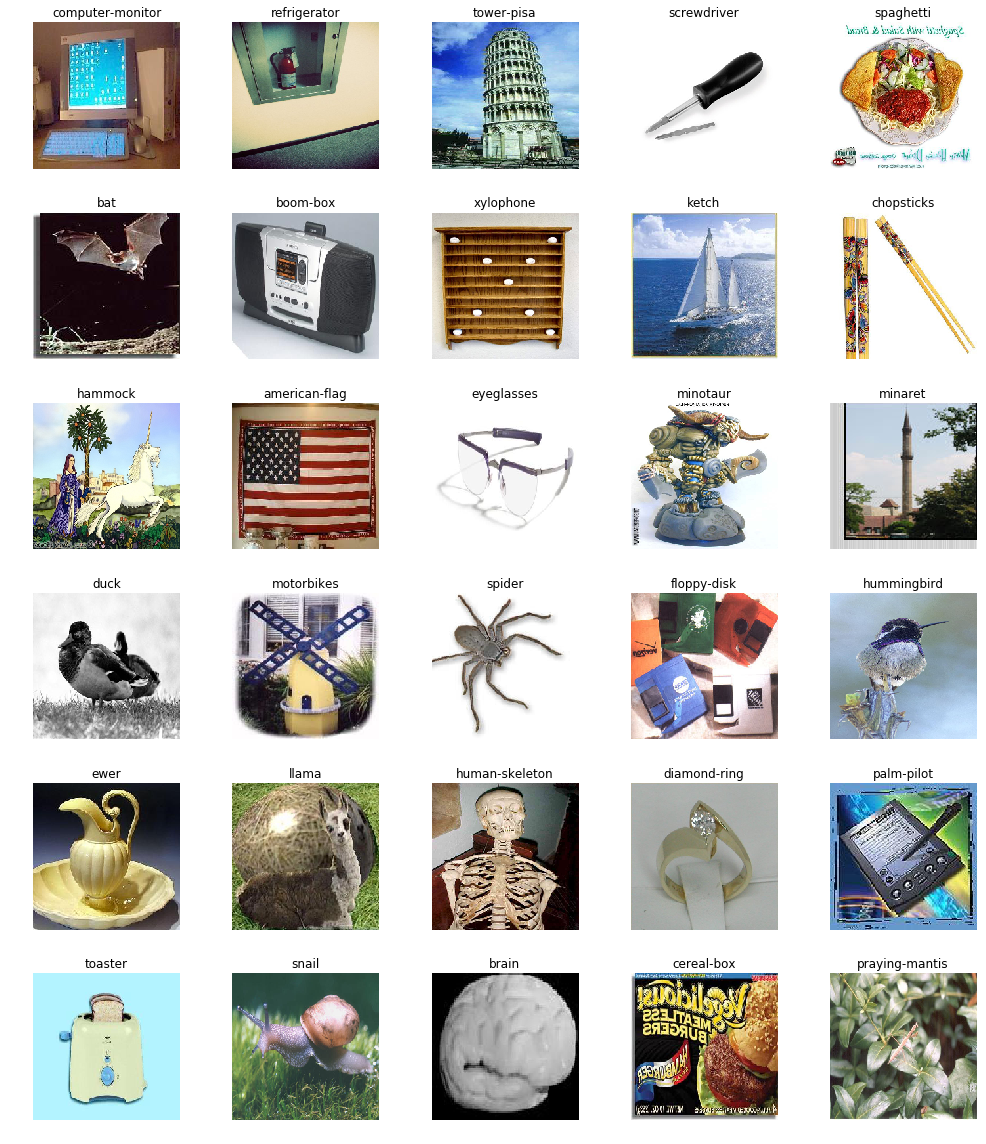

In [17]:
# show pictures, predicted classes and probabilities
_, axes = plt.subplots(nrows=6, ncols=5, figsize=(14, 16))
axes = axes.flatten()
for i, pic in enumerate(pictures):
    axes[i].set_axis_off();
    axes[i].imshow(pic);        
    axes[i].set_title(decode[predictions[i]]);
plt.tight_layout()

# Make predictions

In [18]:
# folder's category name to folder's number 
class_name_to_number = np.load('class_name_to_number.npy')[()]

In [19]:
# in reverse
number_to_class_name = {class_name_to_number[x]: x for x in class_name_to_number}

In [22]:
# convert class number predicted by my model to folder's number 
converter = {x: number_to_class_name[decode[x]] for x in decode}

In [30]:
257 in converter.values()

False

In [33]:
P = pd.DataFrame({'image': test_file_names, 'my_class': test_classes})
P['image'] = P['image'].apply(lambda x: x + '.jpg')
P['class'] = P['my_class'].apply(lambda x: converter[x])

In [35]:
P[['image', 'class']].to_csv('predictions.csv', index=False)